In [1]:
from lxml import objectify
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
path=r'dataset/REFIT_BUILDING_SURVEY.xml'
tree = objectify.parse(path)
root = tree.getroot()
NS={'a':'http://www.refitsmarthomes.org'}

In [3]:
path=r'dataset/REFIT_TIME_SERIES_VALUES.csv'
csv=pd.read_csv(path, index_col=0, parse_dates=[1])

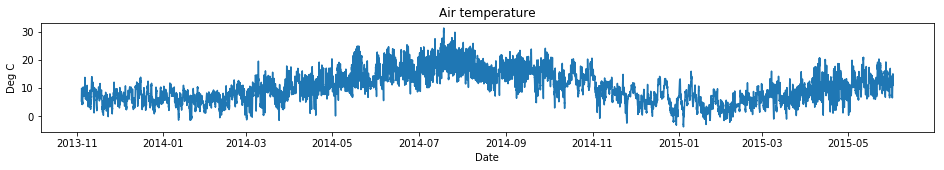

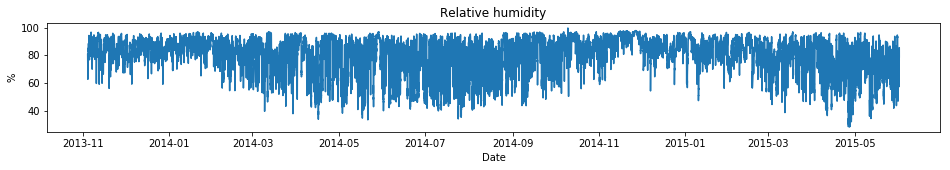

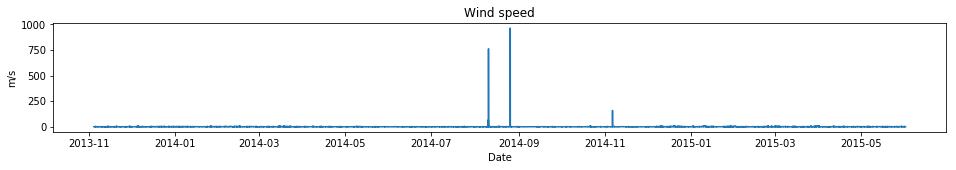

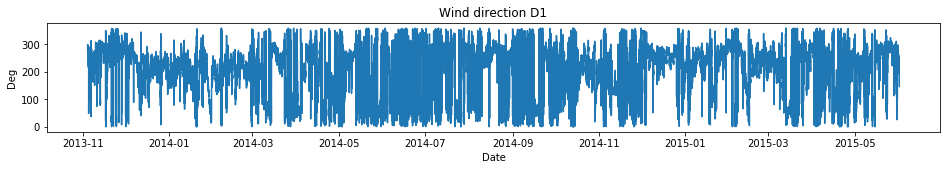

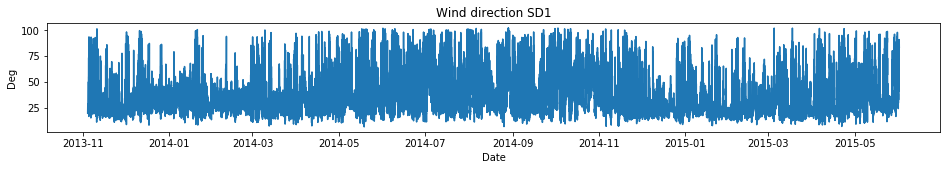

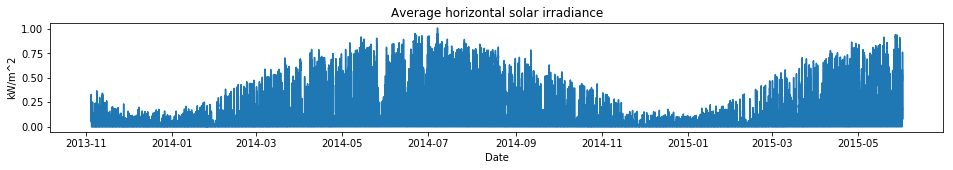

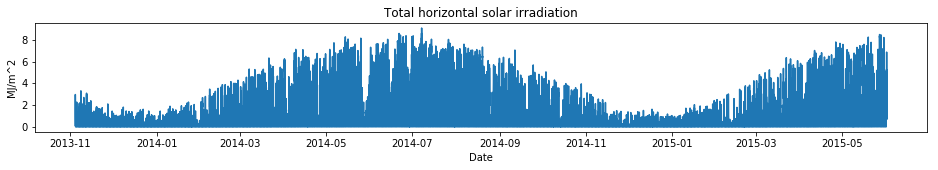

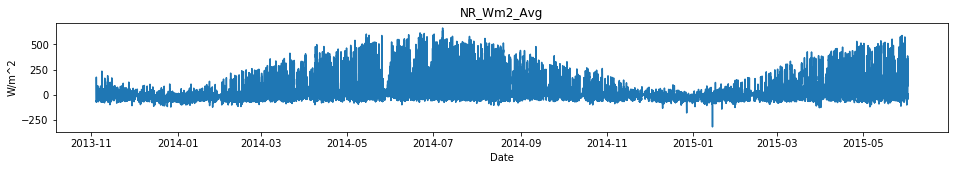

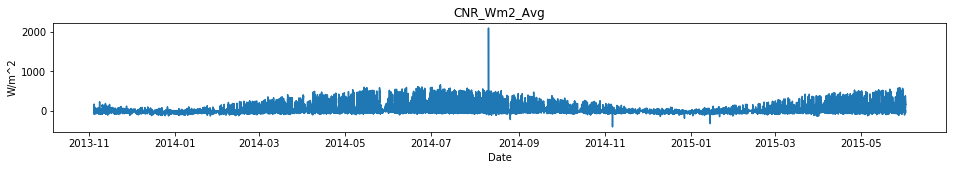

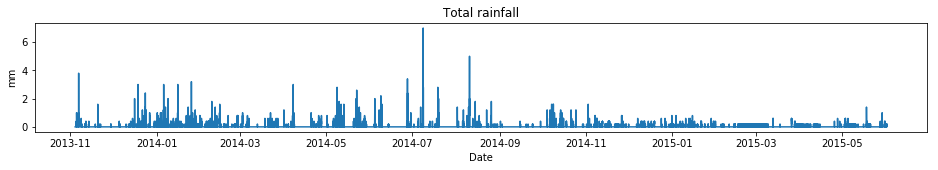

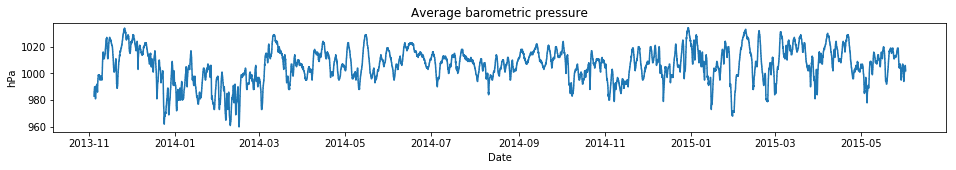

In [9]:
# Plot all climate data

elements=root.xpath('./a:Stock/a:Climate/a:Sensor/a:TimeSeriesVariable', namespaces=NS)
for e in elements:
    id = e.get('id')
    variable_type=e.get('variableType')
    units=e.get('units')
    fig, ax = plt.subplots(figsize=(16,2))
    ax.set_title(variable_type)
    ax.set_xlabel('Date')
    ax.set_ylabel(units)
    ax.plot(csv.loc[id]['dateTime'],csv.loc[id]['data'])
    plt.show()

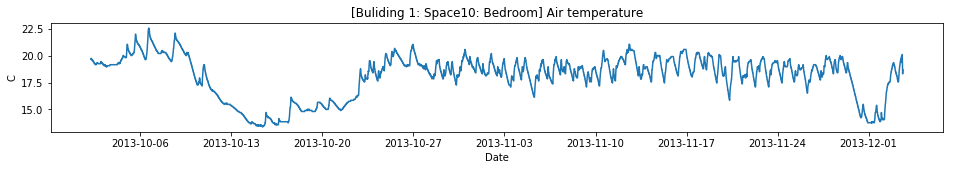

In [13]:
# Plot air temperature inside the room
# Different colors == different sensors

building_num = 1
space_name = 'Bedroom'
spaces=root.xpath('./a:Stock/a:Building[%d]/a:Space[@roomType=\'%s\']' % (building_num, space_name), namespaces=NS)
for space in spaces:
    space_id = space.get('id')
    temp_sens = space.xpath('./a:Sensor/a:TimeSeriesVariable[@variableType=\'Air temperature\']', namespaces=NS)
    variable_type=('Air temperature')
    units='C'
    fig, ax = plt.subplots(figsize=(16,2))
    ax.set_title('[Buliding %d: %s: %s] %s' % (building_num,space_id,space_name,variable_type))
    ax.set_xlabel('Date')
    ax.set_ylabel(units)
    for ts in temp_sens:
        id = ts.get('id')
        ax.plot(csv.loc[id]['dateTime'],csv.loc[id]['data'])
    
    plt.show()

[('id', 'TimeSeriesVariable2193'), ('startDateTime', '2014-07-23T16:13:00Z'), ('endDateTime', '2015-04-28T11:43:00Z'), ('variableType', 'Motion'), ('intervalType', 'VariableInterval'), ('repeatsOmitted', 'No'), ('hasDuplicateTimestamps', 'Yes')]


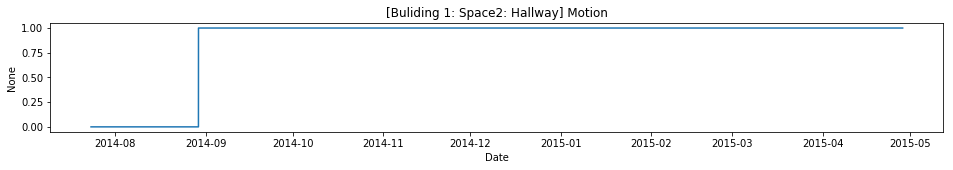

[('id', 'TimeSeriesVariable2190'), ('startDateTime', '2014-07-23T14:37:00Z'), ('endDateTime', '2015-04-28T11:33:00Z'), ('variableType', 'Motion'), ('intervalType', 'VariableInterval'), ('repeatsOmitted', 'No'), ('hasDuplicateTimestamps', 'Yes')]


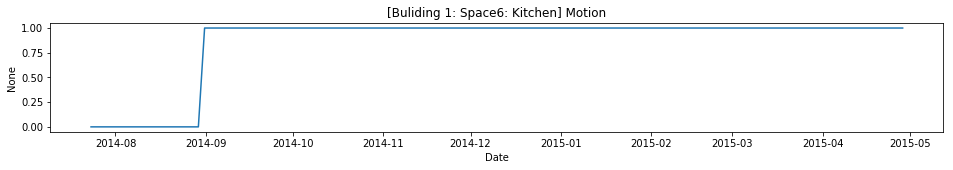

[('id', 'TimeSeriesVariable2097'), ('startDateTime', '2014-07-22T16:36:00Z'), ('endDateTime', '2015-04-28T11:33:00Z'), ('variableType', 'Motion'), ('intervalType', 'VariableInterval'), ('repeatsOmitted', 'No'), ('hasDuplicateTimestamps', 'Yes')]


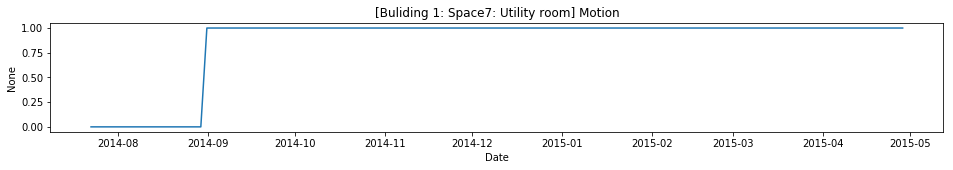

[('id', 'TimeSeriesVariable2191'), ('startDateTime', '2014-07-23T15:47:00Z'), ('endDateTime', '2015-04-28T11:44:00Z'), ('variableType', 'Motion'), ('intervalType', 'VariableInterval'), ('repeatsOmitted', 'No'), ('hasDuplicateTimestamps', 'Yes')]


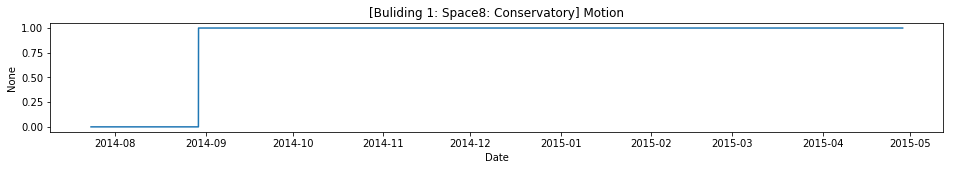

[('id', 'TimeSeriesVariable2192'), ('startDateTime', '2014-07-23T14:37:00Z'), ('endDateTime', '2014-12-29T20:26:00Z'), ('variableType', 'Motion'), ('intervalType', 'VariableInterval'), ('repeatsOmitted', 'No'), ('hasDuplicateTimestamps', 'Yes')]


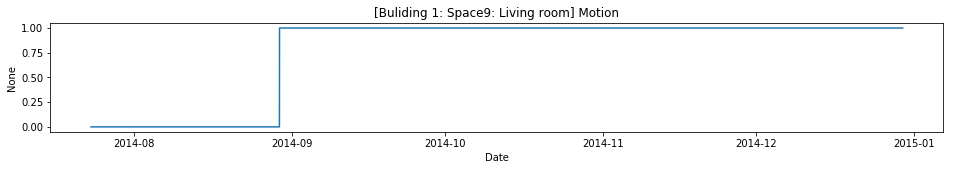

In [18]:
building_num = 1
time_ser_var_name = 'Motion'
spaces = root.xpath('./a:Stock/a:Building[%d]/a:Space' % (building_num), namespaces=NS)
for space in spaces:
    space_id = space.get('id')
    space_name = space.get('roomType')
    time_ser_vars = space.xpath('./a:Sensor/a:TimeSeriesVariable[@variableType=\'%s\']' % (time_ser_var_name), namespaces=NS)
    for time_ser_var in time_ser_vars:
        print (time_ser_var.items())
        
        id = time_ser_var.get('id')
        var_type = time_ser_var.get('variableType')
        units = time_ser_var.get('units')
        fig, ax = plt.subplots(figsize=(16,2))
        
        ax.set_title('[Buliding %d: %s: %s] %s' % (building_num,space_id,space_name,var_type))
        ax.set_xlabel('Date')
        ax.set_ylabel(units)
        time = csv.loc[id]['dateTime']
        data = csv.loc[id]['data']
        data = numpy.add(data,10004)
        ax.plot(time, data)
        plt.show()

(55127,)


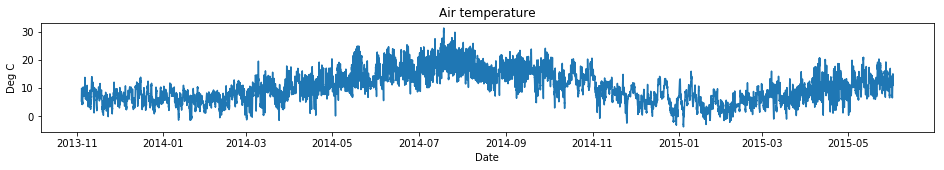

In [12]:
# Plot all climate data

time_ser_var_type = 'Air temperature'

elements=root.xpath('./a:Stock/a:Climate/a:Sensor/a:TimeSeriesVariable[@variableType=\'%s\']' % (time_ser_var_type), namespaces=NS)
e = elements[0]
id = e.get('id')
variable_type=e.get('variableType')
units=e.get('units')
fig, ax = plt.subplots(figsize=(16,2))
ax.set_title(variable_type)
ax.set_xlabel('Date')
ax.set_ylabel(units)
climate_time = csv.loc[id]['dateTime']
climate_data = csv.loc[id]['data']
print(climate_data.shape)
ax.plot(climate_time,climate_data)
plt.show()


(30944,)


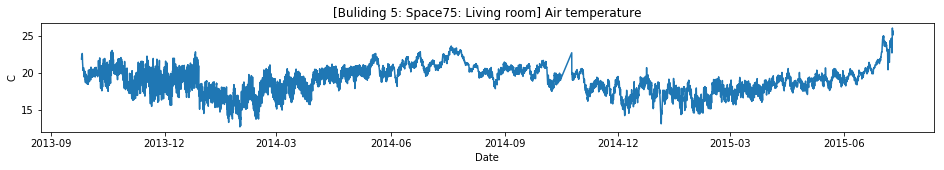

In [9]:
# Plot the air temperature insode the room (using data from all temperature sensors in the room)

building_num = 5
space_num = 8
variable_type = 'Air temperature'
spaces=root.xpath('./a:Stock/a:Building[%d]/a:Space[%d]' % (building_num, space_num), namespaces=NS)
space = spaces[0]
space_id = space.get('id')
space_name = space.get('roomType')
temp_sens = space.xpath('./a:Sensor/a:TimeSeriesVariable[@variableType=\'%s\']' % (variable_type), namespaces=NS)
units='C'
fig, ax = plt.subplots(figsize=(16,2))
ax.set_title('[Buliding %d: %s: %s] %s' % (building_num,space_id,space_name,variable_type))
ax.set_xlabel('Date')
ax.set_ylabel(units)

ts = temp_sens[0]
id = ts.get('id')
temp_data = csv.loc[id]['data']
temp_time = csv.loc[id]['dateTime']

for ts in temp_sens[1:]:
    id = ts.get('id')
    temp_data = temp_data.append(csv.loc[id]['data'])
    temp_time = temp_time.append(csv.loc[id]['dateTime'])

print(temp_data.shape)
ax.plot(temp_time,temp_data)
plt.show()


(28704,)


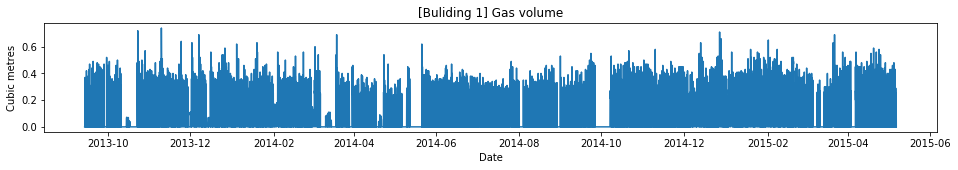

In [10]:
# Plot the gas consumption of the building

building_num = 1
# meter=root.xpath('./a:Stock/a:Building[%d]/a:Meter[@meterType = \'Gas\']/a:TimeSeriesVariable' % (building_num), namespaces=NS)
meter=root.xpath('./a:Stock/a:Building[%d]/a:Meter[@meterType = \'Gas\']/a:Sensor/a:TimeSeriesVariable' % (building_num), namespaces=NS)
meter=meter[0]
units=meter.get('units')
variable_type=meter.get('variableType')
fig, ax = plt.subplots(figsize=(16,2))
ax.set_title('[Buliding %d] %s' % (building_num,variable_type))
ax.set_xlabel('Date')
ax.set_ylabel(units)

id = meter.get('id')
gas_data = csv.loc[id]['data']
gas_time = csv.loc[id]['dateTime']


print(gas_data.shape)
ax.plot(gas_time,gas_data)
plt.show()


In [7]:
path=r'dataset/CLEAN_House%d.csv' % building_num
energy_csv=pd.read_csv(path, index_col=0, parse_dates=[0])

In [16]:
temp_data.index = temp_time
climate_data.index = climate_time
gas_data.index = gas_time

energy_data = energy_csv.loc[energy_csv.index,['Aggregate']]

temp_data_pd = pd.DataFrame(temp_data).resample('H').mean()
climate_pd = pd.DataFrame(climate_data).resample('H').mean()
energy_pd = pd.DataFrame(energy_data).resample('H').mean()
gas_pd = pd.DataFrame(gas_data).resample('H').mean()

temp_data_pd.columns = ['u_temp']
climate_pd.columns = ['env_temp']
energy_pd.columns = ['u_energy']
gas_pd.columns = ['u_gas']

data_pd = temp_data_pd.join(climate_pd)
data_pd = data_pd.join(energy_pd)
data_pd = data_pd.join(gas_pd)

data_pd = data_pd.dropna(0,'any')

data_pd.to_csv('dataset/building%d_data.csv' % (building_num))

In [5]:
num = 24

building_num = 1
path=r'dataset/CLEAN_House%d.csv' % building_num
energy_csv_1=pd.read_csv(path, index_col=0, parse_dates=[0])

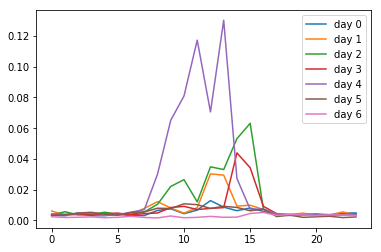

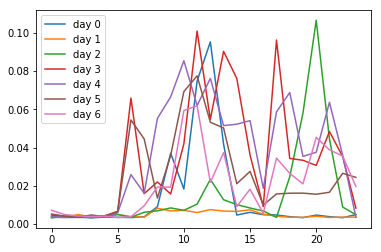

-----------------


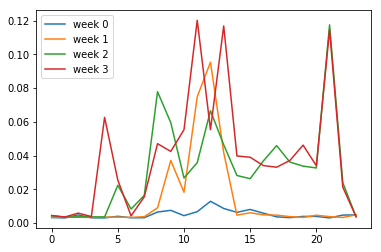

In [15]:
energy_data = energy_csv_1.loc[energy_csv.index,['Aggregate']]
energy_data_pd = pd.DataFrame(energy_data).resample('H').mean()

energy_data_pd = energy_data_pd.drop(energy_data_pd.index[:11+24*3])

# print(energy_data_pd)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(energy_data_pd.dropna().values)

for i in range(7):
    plt.plot(scaled[24*i:24*(i+1)], label='day %d' % (i))
    
plt.legend()
plt.show()


for i in range(7):
    plt.plot(scaled[24*(i+7):24*(i+8)], label='day %d' % (i))
    
plt.legend()
plt.show()

print('-----------------')

week_day = 1
for i in range(4):
    plt.plot(scaled[24*(i)*7+24*(week_day-1):24*(i)*7+24+24*(week_day-1)], label='week %d' % (i))
    
plt.legend()
plt.show()

# building_num = 4
# path=r'dataset/energy/House_%d.csv' % building_num
# energy_csv=pd.read_csv(path, index_col=0, parse_dates=[0])

# energy_data = energy_csv.loc[energy_csv.index,['Aggregate']]
# energy_data_pd = pd.DataFrame(energy_data).resample('H').mean()

# scaled = scaler.fit_transform(energy_data_pd.dropna().values)

# plt.plot(scaled[0:num], label='building_%d' % (building_num))


# plt.legend()
# plt.show()

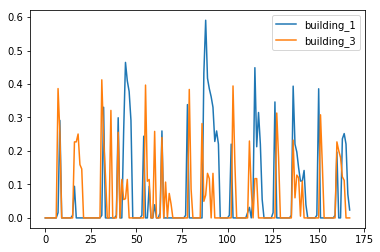

In [23]:
start_num = 0
end_num = 24*7

building_num = 1
gas=root.xpath('./a:Stock/a:Building[%d]/a:Meter[@meterType=\'Gas\']/a:Sensor/a:TimeSeriesVariable' % (building_num), namespaces=NS)
gas = gas[0]
id = gas.get('id')
gas_data = csv.loc[id]['data']
gas_time = csv.loc[id]['dateTime']
gas_data.index = gas_time
gas_data_pd = pd.DataFrame(gas_data).resample('H').mean()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(gas_data_pd.dropna().values)


plt.plot(scaled[start_num:end_num], label='building_%d' % (building_num))

building_num = 3
gas=root.xpath('./a:Stock/a:Building[%d]/a:Meter[@meterType=\'Gas\']/a:Sensor/a:TimeSeriesVariable' % (building_num), namespaces=NS)
gas = gas[0]
id = gas.get('id')
gas_data = csv.loc[id]['data']
gas_time = csv.loc[id]['dateTime']
gas_data.index = gas_time
gas_data_pd = pd.DataFrame(gas_data).resample('H').mean()

scaled = scaler.fit_transform(gas_data_pd.dropna().values)


plt.plot(scaled[start_num:end_num], label='building_%d' % (building_num))


plt.legend()
plt.show()

(55127,)


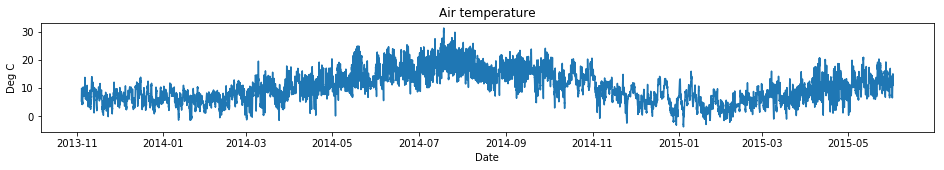

(40612,)


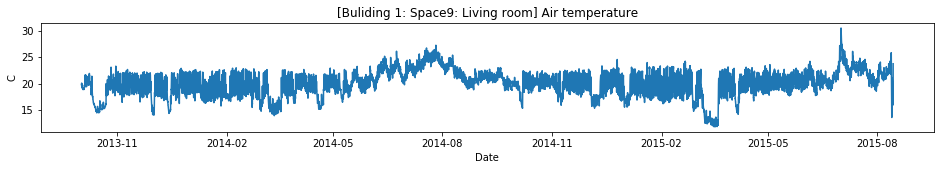

(28704,)


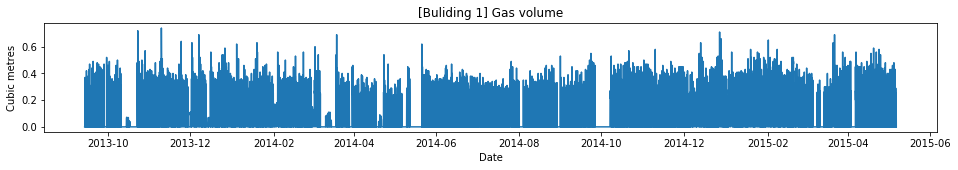

In [54]:
building_num = 1
# space_num = 8  # for 'u_temp'
space_type = 'Living room' # for 'u_temp'


# Plot all climate data
elements=root.xpath('./a:Stock/a:Climate/a:Sensor/a:TimeSeriesVariable[@variableType=\'Air temperature\']', namespaces=NS)
e = elements[0]
id = e.get('id')
variable_type=e.get('variableType')
units=e.get('units')
fig, ax = plt.subplots(figsize=(16,2))
ax.set_title(variable_type)
ax.set_xlabel('Date')
ax.set_ylabel(units)
climate_time = csv.loc[id]['dateTime']
climate_data = csv.loc[id]['data']
print(climate_data.shape)
ax.plot(climate_time,climate_data)
plt.show()

# Plot the air temperature insode the room (using data from all temperature sensors in the room)

space=root.xpath('./a:Stock/a:Building[%d]/a:Space[@roomType=\'%s\']' % (building_num, space_type), namespaces=NS)
space = space[0]
space_id = space.get('id')
space_name = space.get('roomType')
temp_sens = space.xpath('./a:Sensor/a:TimeSeriesVariable[@variableType=\'Air temperature\']', namespaces=NS)

ts = temp_sens[0]
id = ts.get('id')
units=ts.get('units')
temp_data = csv.loc[id]['data']
temp_time = csv.loc[id]['dateTime']

for ts in temp_sens[1:]:
    id = ts.get('id')
    temp_data = temp_data.append(csv.loc[id]['data'])
    temp_time = temp_time.append(csv.loc[id]['dateTime'])

fig, ax = plt.subplots(figsize=(16,2))
ax.set_title('[Buliding %d: %s: %s] %s' % (building_num,space_id,space_name,variable_type))
ax.set_xlabel('Date')
ax.set_ylabel(units)

print(temp_data.shape)
ax.plot(temp_time,temp_data)
plt.show()

# Plot the gas consumption of the building

meter=root.xpath('./a:Stock/a:Building[%d]/a:Meter[@meterType = \'Gas\']/a:Sensor/a:TimeSeriesVariable' % (building_num), namespaces=NS)
meter=meter[0]

units=meter.get('units')
variable_type=meter.get('variableType')
fig, ax = plt.subplots(figsize=(16,2))
ax.set_title('[Buliding %d] %s' % (building_num,variable_type))
ax.set_xlabel('Date')
ax.set_ylabel(units)

id = meter.get('id')
gas_data = csv.loc[id]['data']
gas_time = csv.loc[id]['dateTime']

print(gas_data.shape)
ax.plot(gas_time,gas_data)
plt.show()

# ----------------------

path=r'dataset/energy/House_%d.csv' % building_num
energy_csv=pd.read_csv(path, index_col=0, parse_dates=[0])

temp_data.index = temp_time
climate_data.index = climate_time
gas_data.index = gas_time

energy_data = energy_csv.loc[energy_csv.index,['Aggregate']]

temp_data_pd = pd.DataFrame(temp_data).resample('H').mean()
climate_pd = pd.DataFrame(climate_data).resample('H').mean()
energy_pd = pd.DataFrame(energy_data).resample('H').mean()
gas_pd = pd.DataFrame(gas_data).resample('H').mean()

temp_data_pd.columns = ['u_temp']
climate_pd.columns = ['env_temp']
energy_pd.columns = ['u_energy']
gas_pd.columns = ['u_gas']

data_pd = temp_data_pd.join(climate_pd)
data_pd = data_pd.join(energy_pd)
data_pd = data_pd.join(gas_pd)

data_pd = data_pd.dropna(0,'any')

data_pd.to_csv('dataset/building%d_data.csv' % (building_num))

